<a href="https://colab.research.google.com/github/Eaglesight02/Pheonix_Squadron/blob/wing_0/retinal_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/andrewmvd/retinal-disease-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: thirumalaraom
Your Kaggle Key: ··········


100%|██████████| 7.43G/7.43G [00:33<00:00, 239MB/s]


In [70]:
import pandas as pd
data = pd.read_csv("/content/retinal-disease-classification/Training_Set/Training_Set/RFMiD_Training_Labels.csv")
valid = pd.read_csv("/content/retinal-disease-classification/Evaluation_Set/Evaluation_Set/RFMiD_Validation_Labels.csv")

In [14]:
# data = pd.concat([data, valid], ignore_index = True)

In [71]:
data_Directory = "/content/retinal-disease-classification/Training_Set/Training_Set/Training/"

In [72]:
data['image_Path'] = data['ID'].apply(lambda id : data_Directory + str(id) +".png")

In [73]:
data['image_Path'][0]

'/content/retinal-disease-classification/Training_Set/Training_Set/Training/1.png'

In [ ]:
data

In [77]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential

In [78]:
import cv2
import matplotlib.pyplot as plt
def get_Image_Pixels(image_Path):
  image_Pixels = cv2.imread(image_Path)
  image_Pixels = cv2.cvtColor(image_Pixels, cv2.COLOR_BGR2RGB)
  resize = keras.layers.Resizing(224, 336)
  rescale = keras.layers.Rescaling(1./255)
  return resize(rescale(image_Pixels))

In [79]:
data['image_Pixels'] = data['image_Path'].apply(get_Image_Pixels)

In [ ]:
data.head(2)

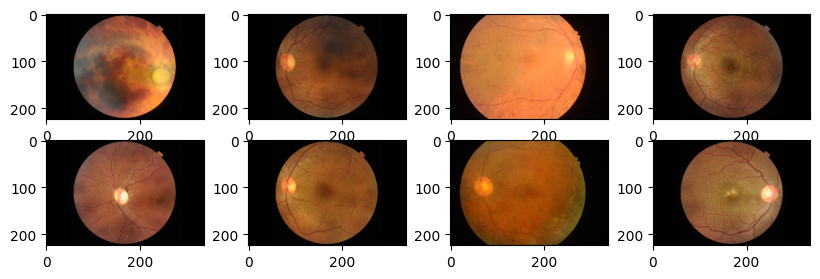

In [82]:
import random
plt.figure(figsize = (10, 3))
for i in range(8):
  plt.subplot(2, 4, i+1)
  plt.imshow(random.choice(data['image_Pixels']))

In [83]:
from keras.applications import VGG16
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.optimizers import Adam

In [84]:
vgg = VGG16(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))
for layer in vgg.layers:
  layer.trainable = False
x = Flatten()(vgg.output)
x = Dense(256, activation = 'relu')(x) 
x = Dense(128, activation = 'relu')(x) 
output = Dense(46, activation = 'softmax')(x)

In [85]:
# model = Sequential()
# model.add(keras.layers.Resizing(224, 224))
# model.add(keras.layers.Rescaling(1./255))
model = Model(inputs = vgg.input, outputs = output)

In [92]:
model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [87]:
type(data['image_Pixels'][0])

tensorflow.python.framework.ops.EagerTensor

In [95]:
import numpy as np
data['image_Tensor'] = data['image_Pixels'].apply(np.array)
data['image_Tensor_1'] = data['image_Tensor'].apply(tf.convert_to_tensor)

In [97]:
type(data['image_Tensor_1'][0])

tensorflow.python.framework.ops.EagerTensor

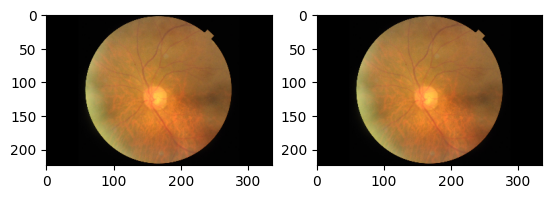

In [90]:
plt.subplot(1, 2, 1)
plt.imshow(data['image_Pixels'][634])
plt.subplot(1, 2, 2)
plt.imshow(data['image_Tensor'][634])

In [67]:
# data['image_Tensor_1'] = data['image_Tensor'].apply(tf.reshape, args = [(-1, 224, 336, 3)])

In [98]:
model.fit(x = data['image_Tensor_1'], y = data['Disease_Risk'], epochs = 4)

ValueError: ignored